In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.











In [2]:
options = {
    'model':'cfg/dsc-tiny-yolo.cfg',
    'load' : 'bin/yolov2.weights',# cfg와 weights의 이름은 yolo로 통일하여 저장할 것을 권장
    'threshold' : 0.3,
    'gpu' : 1.0
}

In [3]:
tfnet = TFNet(options)

Parsing cfg/dsc-tiny-yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.00899958610534668s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)



C:\Users\user\darkflow\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/dsc-tiny-yolo.cfg instead
  cfg_path, FLAGS.model))


 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 13, 256)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 13, 13, 512)
 Load  |  Yep!  | maxp 2x2p0_1                     | (?, 13, 13, 512)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 13, 13, 1024)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 13, 13, 1024)
 Load  |  Yep!  | conv 1x1p0_1    linear           | (?, 13, 13, 205)
-------+-------

In [4]:
img = cv2.imread('sample_img/sample_money.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(img) # 객체 예측값 반환

img.shape

(205, 246, 3)

In [5]:
# 객체 별 bounding box의 색을 다르게 해주기 위한 코드
colors = [tuple(255*np.random.rand(3)) for each in range(10)]

print(len(results))
# 다중 객체 bounding box 생성 및 labeling 작업
for color, result in zip(colors, results):
    t1 = (result['topleft']['x'],result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    print(label)

    img = cv2.rectangle(img, t1, br, color, 7) # bounding box 생성
    img = cv2.putText(img, label, t1, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2) # labeling 작업

0


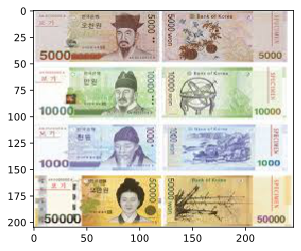

In [6]:
plt.imshow(img)
plt.show()